## Data Preprocessing - 2

Import statements

In [75]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder


In [76]:
c_fraud_df = pd.read_csv("updated_convo.csv")
c_fraud_df.head()

,Unnamed: 0,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation
0,0,Normal,+1-917-555-3286,08:50:33,62,3,25,"Hope. Since ago travelled, he has forgotten hi..."
1,1,Normal,+1-205-795-8028,17:05:53,78,3,31,Horrible you eat mass eat until u forgot about...
2,2,Normal,+1-702-412-9422,16:29:51,55,4,7,Great! I have to run now so ttyl!
3,3,Normal,+1-915-426-2998,17:36:33,48,9,14,"Sorry, I'll call later"
4,4,Normal,+1-915-543-9437,20:19:36,262,3,16,"Jay wants to work out first, how's 4 sound?"


In [77]:
c_fraud_df.drop('Unnamed: 0',axis=1,inplace=True)

In [78]:
c_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17590 entries, 0 to 17589
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Call Type                17590 non-null  object
 1   Caller Number            17590 non-null  object
 2   Call Time                17590 non-null  object
 3   Call Duration(in s)      17590 non-null  int64 
 4   Call Frequency Per Day   17590 non-null  int64 
 5   Call Frequency Per Week  17590 non-null  int64 
 6   Conversation             17590 non-null  object
dtypes: int64(3), object(4)
memory usage: 962.1+ KB


In [79]:
c_fraud_df["Conversation"].fillna('', inplace=True)
c_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17590 entries, 0 to 17589
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Call Type                17590 non-null  object
 1   Caller Number            17590 non-null  object
 2   Call Time                17590 non-null  object
 3   Call Duration(in s)      17590 non-null  int64 
 4   Call Frequency Per Day   17590 non-null  int64 
 5   Call Frequency Per Week  17590 non-null  int64 
 6   Conversation             17590 non-null  object
dtypes: int64(3), object(4)
memory usage: 962.1+ KB


C:\Users\Dell\AppData\Local\Temp\ipykernel_27888\1389048123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_fraud_df["Conversation"].fillna('', inplace=True)


In [80]:
c_fraud_df['Call Frequency Per Day'] = c_fraud_df['Call Frequency Per Day'].astype(int)
c_fraud_df['Call Frequency Per Week'] = c_fraud_df['Call Frequency Per Week'].astype(int)
c_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17590 entries, 0 to 17589
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Call Type                17590 non-null  object
 1   Caller Number            17590 non-null  object
 2   Call Time                17590 non-null  object
 3   Call Duration(in s)      17590 non-null  int64 
 4   Call Frequency Per Day   17590 non-null  int64 
 5   Call Frequency Per Week  17590 non-null  int64 
 6   Conversation             17590 non-null  object
dtypes: int64(3), object(4)
memory usage: 962.1+ KB


Converting Call time to time series data


In [81]:
c_fraud_df['Call Time'] = pd.to_datetime(c_fraud_df['Call Time'], format='%H:%M:%S')
c_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17590 entries, 0 to 17589
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Call Type                17590 non-null  object        
 1   Caller Number            17590 non-null  object        
 2   Call Time                17590 non-null  datetime64[ns]
 3   Call Duration(in s)      17590 non-null  int64         
 4   Call Frequency Per Day   17590 non-null  int64         
 5   Call Frequency Per Week  17590 non-null  int64         
 6   Conversation             17590 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 962.1+ KB


In [82]:
c_fraud_df.dtypes

Call Type                          object
Caller Number                      object
Call Time                  datetime64[ns]
Call Duration(in s)                 int64
Call Frequency Per Day              int64
Call Frequency Per Week             int64
Conversation                       object
dtype: object

In [83]:
c_fraud_df.describe(include='all')

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation
count,17590,17590,17590,17590.000000,17590.000000,17590.000000,17590
unique,3,17589,NaN,NaN,NaN,NaN,10039
top,Normal,+1-917-762-2787,NaN,NaN,NaN,NaN,"Sorry, I'll call later"
freq,15403,2,NaN,NaN,NaN,NaN,80
mean,NaN,NaN,1900-01-01 15:22:01.756452608,366.017339,5.155884,20.346788,NaN
min,NaN,NaN,1900-01-01 04:01:52,10.000000,1.000000,1.000000,NaN
25%,NaN,NaN,1900-01-01 11:36:09.750000128,107.000000,3.000000,10.000000,NaN
50%,NaN,NaN,1900-01-01 16:07:41.500000,240.000000,4.000000,17.000000,NaN
75%,NaN,NaN,1900-01-01 18:48:52.750000128,427.000000,7.000000,29.000000,NaN
max,NaN,NaN,1900-01-01 23:59:57,3600.000000,15.000000,80.000000,NaN


In [84]:
value_counts_1 = c_fraud_df["Call Type"].value_counts()

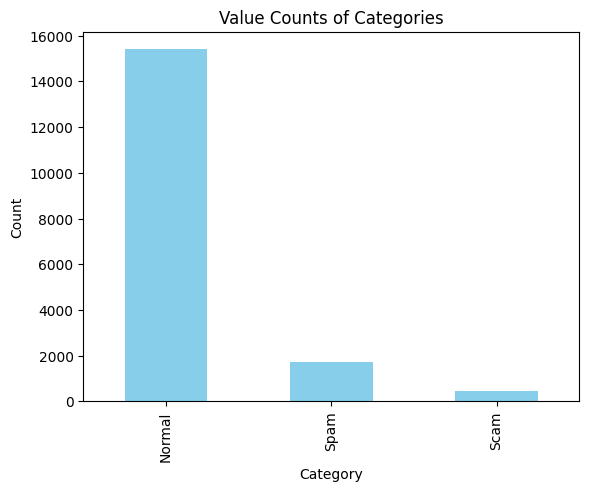

In [85]:
value_counts_1.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Categories')
plt.show()

#It is very much clear from the below graph that there exists a class imbalance. Therefore there is a necessity for Oversampling.

Label Encoding

In [86]:
#Initial encoding just for examining data
c_fraud_df.loc[c_fraud_df['Call Type']=='Normal','Call Type'] = 0
c_fraud_df.loc[c_fraud_df['Call Type']=='Spam','Call Type'] = 1
c_fraud_df.loc[c_fraud_df['Call Type']=='Scam','Call Type'] = 2

# le = LabelEncoder()
# c_fraud_df['Call Type'] = le.fit_transform(c_fraud_df["Call Type"])
# c_fraud_df

#LabelEncoding defines an order i.e 2 is high and 1 is low sort of. Therefore use manual encoding procedure


In [87]:
c_fraud_df.head()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation
0,0,+1-917-555-3286,1900-01-01 08:50:33,62,3,25,"Hope. Since ago travelled, he has forgotten hi..."
1,0,+1-205-795-8028,1900-01-01 17:05:53,78,3,31,Horrible you eat mass eat until u forgot about...
2,0,+1-702-412-9422,1900-01-01 16:29:51,55,4,7,Great! I have to run now so ttyl!
3,0,+1-915-426-2998,1900-01-01 17:36:33,48,9,14,"Sorry, I'll call later"
4,0,+1-915-543-9437,1900-01-01 20:19:36,262,3,16,"Jay wants to work out first, how's 4 sound?"


Encoding format For call type:

Normal = 0

Spam = 1

Scam = 2


In [88]:
c_fraud_df.describe(include='all')

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation
count,17590.0,17590,17590,17590.000000,17590.000000,17590.000000,17590
unique,3.0,17589,NaN,NaN,NaN,NaN,10039
top,0.0,+1-917-762-2787,NaN,NaN,NaN,NaN,"Sorry, I'll call later"
freq,15403.0,2,NaN,NaN,NaN,NaN,80
mean,NaN,NaN,1900-01-01 15:22:01.756452608,366.017339,5.155884,20.346788,NaN
min,NaN,NaN,1900-01-01 04:01:52,10.000000,1.000000,1.000000,NaN
25%,NaN,NaN,1900-01-01 11:36:09.750000128,107.000000,3.000000,10.000000,NaN
50%,NaN,NaN,1900-01-01 16:07:41.500000,240.000000,4.000000,17.000000,NaN
75%,NaN,NaN,1900-01-01 18:48:52.750000128,427.000000,7.000000,29.000000,NaN
max,NaN,NaN,1900-01-01 23:59:57,3600.000000,15.000000,80.000000,NaN


Including additional columns out of existing features for plotting and analysis

In [89]:
c_fraud_df.head()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation
0,0,+1-917-555-3286,1900-01-01 08:50:33,62,3,25,"Hope. Since ago travelled, he has forgotten hi..."
1,0,+1-205-795-8028,1900-01-01 17:05:53,78,3,31,Horrible you eat mass eat until u forgot about...
2,0,+1-702-412-9422,1900-01-01 16:29:51,55,4,7,Great! I have to run now so ttyl!
3,0,+1-915-426-2998,1900-01-01 17:36:33,48,9,14,"Sorry, I'll call later"
4,0,+1-915-543-9437,1900-01-01 20:19:36,262,3,16,"Jay wants to work out first, how's 4 sound?"


In [90]:
print(type(c_fraud_df['Call Time'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [91]:
c_fraud_df['Hour'] = c_fraud_df['Call Time'].dt.hour
c_fraud_df.head()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation,Hour
0,0,+1-917-555-3286,1900-01-01 08:50:33,62,3,25,"Hope. Since ago travelled, he has forgotten hi...",8
1,0,+1-205-795-8028,1900-01-01 17:05:53,78,3,31,Horrible you eat mass eat until u forgot about...,17
2,0,+1-702-412-9422,1900-01-01 16:29:51,55,4,7,Great! I have to run now so ttyl!,16
3,0,+1-915-426-2998,1900-01-01 17:36:33,48,9,14,"Sorry, I'll call later",17
4,0,+1-915-543-9437,1900-01-01 20:19:36,262,3,16,"Jay wants to work out first, how's 4 sound?",20


In [92]:
c_fraud_df['Hour'].value_counts()
#We can see that the hour of 7 in the morning is the time at which most of the calls in US are made followed by 3 in the afternoon
#Least number of calls are made as it follows to night time

Hour
16    1904
17    1876
21    1308
10    1201
11    1196
20    1179
19    1149
18    1092
15    1003
14     964
12     895
9      892
13     824
8      797
7      631
22     418
23     122
4       53
6       47
5       39
Name: count, dtype: int64

In [93]:
c_fraud_df['Area Code'] = c_fraud_df['Caller Number'].str[3:6]
c_fraud_df.head()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation,Hour,Area Code
0,0,+1-917-555-3286,1900-01-01 08:50:33,62,3,25,"Hope. Since ago travelled, he has forgotten hi...",8,917
1,0,+1-205-795-8028,1900-01-01 17:05:53,78,3,31,Horrible you eat mass eat until u forgot about...,17,205
2,0,+1-702-412-9422,1900-01-01 16:29:51,55,4,7,Great! I have to run now so ttyl!,16,702
3,0,+1-915-426-2998,1900-01-01 17:36:33,48,9,14,"Sorry, I'll call later",17,915
4,0,+1-915-543-9437,1900-01-01 20:19:36,262,3,16,"Jay wants to work out first, how's 4 sound?",20,915


In [94]:
c_fraud_df['Area Code'].value_counts()
#We can see that highest number of calls are made from New York City followed by Pennysylvania. After those two there is almost an equal distribution

Area Code
917    2077
213    1491
323    1325
205    1219
718    1119
628     991
915     964
572     776
912     660
417     631
318     627
919     616
505     447
313     420
617     412
872     393
702     372
832     366
415     355
314     353
619     351
306     342
482     338
646     321
508     319
267     305
Name: count, dtype: int64

Checking Correlations and plotting more graphs

In [95]:
columns_to_exclude = ['Caller Number','Conversation']
correlations = c_fraud_df.drop(columns=columns_to_exclude).corr()
correlations['Call Type']

Call Type                  1.000000
Call Time                  0.040908
Call Duration(in s)        0.058371
Call Frequency Per Day     0.494189
Call Frequency Per Week    0.505737
Hour                       0.041777
Area Code                  0.028290
Name: Call Type, dtype: float64

Plotting Spam and Scam calls against hour and area code to check correlation

In [96]:
normal_calls = c_fraud_df[c_fraud_df['Call Type'] == 0]
normal_calls.reset_index(drop=True,inplace=True)
normal_calls.tail()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation,Hour,Area Code
15398,0,+1-323-527-1841,1900-01-01 14:49:56,16,5,7,K. To april. Want wait,14,323
15399,0,+1-718-872-8600,1900-01-01 19:41:54,332,4,12,Its ok my arm is feeling weak cut i got a shot...,19,718
15400,0,+1-617-711-8247,1900-01-01 16:21:54,21,2,30,Ouh means computational science... Y they like...,16,617
15401,0,+1-205-543-7635,1900-01-01 10:40:51,147,2,22,"Sorry, I'll call later",10,205
15402,0,+1-646-342-3801,1900-01-01 16:53:26,2370,5,5,You are a very very very very bad girl. Or lady.,16,646


In [97]:
spam_calls = c_fraud_df[c_fraud_df['Call Type'] == 1]
spam_calls.reset_index(drop=True,inplace=True)
spam_calls.tail()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation,Hour,Area Code
1718,1,+1-213-643-8919,1900-01-01 20:08:58,344,15,29,Our dating service has been asked 2 contact U ...,20,213
1719,1,+1-482-672-9558,1900-01-01 19:17:31,138,10,62,GENT! We are trying to contact you. Last weeke...,19,482
1720,1,+1-213-861-8907,1900-01-01 15:37:07,261,11,23,Get your garden ready for summer with a FREE s...,15,213
1721,1,+1-718-380-9117,1900-01-01 21:23:14,210,7,33,dating:i have had two of these. Only started a...,21,718
1722,1,+1-917-791-9831,1900-01-01 18:51:30,38,7,27,Met your garden ready for summer with a FREE s...,18,917


In [98]:
scam_calls = c_fraud_df[c_fraud_df['Call Type'] == 2]
scam_calls.reset_index(drop=True,inplace=True)
scam_calls.tail()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation,Hour,Area Code
459,2,+1-917-908-9798,1900-01-01 10:51:44,1085,9,48,His is the and time we have tried to contact u...,10,917
460,2,+1-415-880-8289,1900-01-01 20:18:45,2757,10,51,URGENT! We are trying to contact U. Todays dra...,20,415
461,2,+1-718-443-2006,1900-01-01 08:09:09,619,10,32,"hello sir, i am from bank of broad, sir i have...",8,718
462,2,+1-619-220-1026,1900-01-01 16:30:03,1594,7,31,Congratulations YOU'of On. You're a Dinner in ...,16,619
463,2,+1-919-834-7399,1900-01-01 19:40:34,861,12,26,Urgent! Please call 09061743811 from lanoline....,19,919


In [99]:
combined_df = pd.concat([scam_calls, spam_calls], ignore_index=True)
shuffled_df = combined_df.sample(frac=1,random_state=40).reset_index(drop=True)
shuffled_df.head()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation,Hour,Area Code
0,2,+1-917-411-6198,1900-01-01 18:02:21,902,9,62,His is the and time we have tried 2 contact u....,18,917
1,1,+1-718-211-6034,1900-01-01 17:05:19,28,9,37,He tried to contact you are your reply to our ...,17,718
2,1,+1-417-214-8439,1900-01-01 14:26:42,45,10,72,Latest Nokia Mobile or iPOD MP3 Player +£400 p...,14,417
3,2,+1-323-939-1605,1900-01-01 20:33:08,1805,11,35,Urgent! Please call 09061213237 from a landlin...,20,323
4,1,+1-917-567-4502,1900-01-01 11:36:15,140,7,54,You have WON a guaranteed £1000 cash or a £200...,11,917


In [100]:
scsp_counts = shuffled_df['Hour'].value_counts().sort_index()
scsp_counts.head()

Hour
7      48
8      95
9     147
10    177
11    162
Name: count, dtype: int64

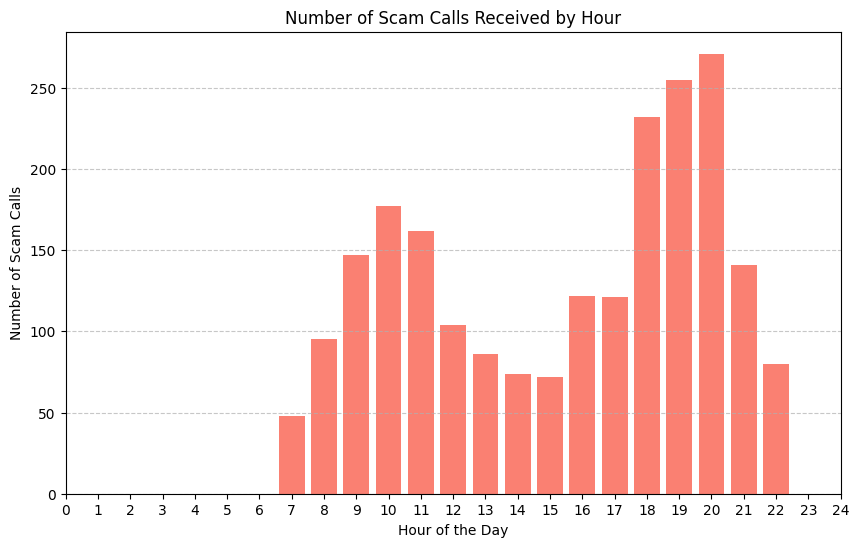

In [101]:
plt.figure(figsize=(10, 6))
plt.bar(scsp_counts.index, scsp_counts.values, color='#FA8072')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Scam Calls')
plt.title('Number of Scam Calls Received by Hour')
plt.xticks(range(0, 25))  # Show all hours from 0 to 24
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#This graph clearly shows that hour or time itself has no significance as scam and spam calls are evenly distributed

In [102]:
scsp_area_code_counts = shuffled_df['Area Code'].value_counts().sort_index()
scsp_area_code_counts.head()

Area Code
205     60
213    194
267     27
306     36
313    122
Name: count, dtype: int64

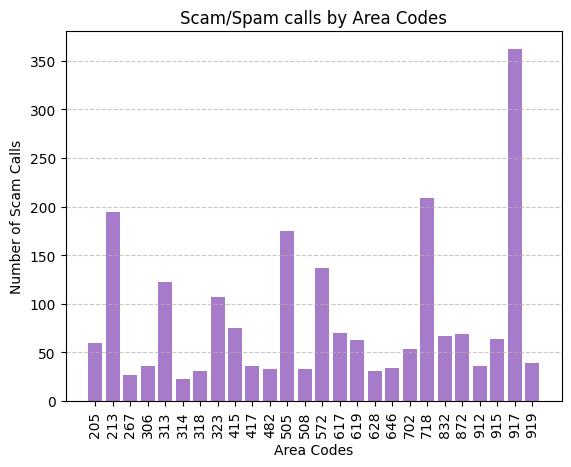

In [103]:
plt.bar(scsp_area_code_counts.index, scsp_area_code_counts.values, color='#A67BCA')
plt.xlabel('Area Codes')
plt.ylabel('Number of Scam Calls')
plt.title('Scam/Spam calls by Area Codes')
plt.xticks(rotation = 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Therefore it can be said that most of the scam calls or spam calls engage in neutral or positive sentiments and don't use negative sentiment
#Therefore sentiment analysis row is also loosely correlated

In [104]:
nor_counts = normal_calls['Area Code'].value_counts().sort_index()
nor_counts.count()

np.int64(26)

In [105]:
sc_counts = scam_calls['Area Code'].value_counts().sort_index()
sc_counts.head()

Area Code
205    12
213    38
267     4
306     8
313    23
Name: count, dtype: int64

In [106]:
sp_counts = spam_calls['Area Code'].value_counts().sort_index()
sp_counts.head()

Area Code
205     48
213    156
267     23
306     28
313     99
Name: count, dtype: int64

In [107]:
codes = set([ '213', '572', '718', '213', '718', '832', '917', '323', '213', '917', '505', '628', '718',
'313', '718', '872', '572', '323', '323', '213', '646', '917', '917', '205', '917', '718', '915', '917', '572', '213', '205',
'702', '505', '505', '917', '617','718', '572', '917', '832', '213', '306', '505', '318', '313','718', '617','917', '415', '505', '267', '505',
'917', '323', '718', '313', '505', '919', '915', '702','508', '417', '415', '619', '314','917', '482', '872', '213', '912','619','917' ])
codes = sorted(codes)

plt.figure(figsize=(20,12))
width = 0.25
values = np.arange(0,24)
# print(values)
# plt.bar(nor_hour_counts.index-width,nor_hour_counts.values,width=width,color = "#beb9db",label = 'NORMAL',log = True)
plt.bar(sp_hour_counts.index,sp_hour_counts.values,width=width, color="#fdcce5",label='SPAM')
plt.bar(sc_hour_counts.index+width,sc_hour_counts.values,width=width,color="#8bd3c7",label='SCAM')
plt.title("Hour of call vs No. of Non- Ham calls") #all calls if first bar function is loaded
plt.xlabel('Hour at which call was made')
plt.ylabel('Number of Calls')
plt.xticks(np.arange(len(values)),labels=values)
plt.legend(fontsize=20)
plt.show()

NameError: name 'sp_hour_counts' is not defined

<Figure size 2000x1200 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,12))
width = 0.25
values = np.arange(0,24)
# print(values)
# plt.bar(nor_hour_counts.index-width,nor_hour_counts.values,width=width,color = "#beb9db",label = 'NORMAL',log = True)
plt.bar(sp_hour_counts.index,sp_hour_counts.values,width= width,color="#fdcce5",label='SPAM')
plt.bar(sc_hour_counts.index+width,sc_hour_counts.values,width=width,color="#8bd3c7",label='SCAM')
plt.title("Hour of call vs No. of Non- Ham calls") #all calls if first bar function is loaded
plt.xlabel('Hour at which call was made')
plt.ylabel('Number of Calls')
plt.xticks(np.arange(len(values)),labels=values)
plt.legend(fontsize =20)
plt.show()

NameError: name 'sp_hour_counts' is not defined

<Figure size 2000x1200 with 0 Axes>

In [ ]:
nor_mean_fw = normal_calls['Call Frequency Per Week'].mean().round(3)
nor_median_fw = normal_calls['Call Frequency Per Week'].median().round(3)
sp_mean_fw = spam_calls['Call Frequency Per Week'].mean().round(3)
sp_median_fw = spam_calls['Call Frequency Per Week'].median().round(3)
sc_mean_fw = scam_calls['Call Frequency Per Week'].mean().round(3)
sc_median_fw = scam_calls['Call Frequency Per Week'].median().round(3)

In [ ]:
categories = ['Normal', 'Spam', 'Scam']
mean_frequency_per_day = np.array([nor_mean_fd, sp_mean_fd, sc_mean_fd])  # Replace with actual values
median_frequency_per_day = np.array([nor_median_fd, sp_median_fd, sc_median_fd])  # Replace with actual values

plt.figure(figsize=(10, 5))
bar_width = 0.35  
indices = np.arange(len(categories)) 

plt.barh(indices - bar_width / 2, mean_frequency_per_day, bar_width, color="#d0f400", edgecolor="#d0ee11", label='Mean')
plt.barh(indices + bar_width / 2, median_frequency_per_day, bar_width, color="#00bfff", edgecolor="#009acd", label='Median')

for i, (mean, median) in enumerate(zip(mean_frequency_per_day, median_frequency_per_day)):
    plt.text(mean + 1, i - bar_width / 2, f'{mean:.2f}', va='center', fontsize=10)
    plt.text(median + 1, i + bar_width / 2, f'{median:.2f}', va='center', fontsize=10)

plt.yticks(indices, categories)
plt.title('Calls Frequency Per Day (Mean vs Median)')
plt.xlabel('Frequency')
plt.legend()
plt.show()

NameError: name 'nor_mean_fd' is not defined